<h1 style="font-size:100px"> Rapport</h1>

<h1 style="font-size:40px">Introduction</h1>

<p style="font-size:20px">
 La  première  étape  d’un  projet  d’apprentissage  automatique  est  la  récupération  et l’importation des données. Malheureusement, dans des projets réels, nous obtenons 
régulièrement des fichiers incomplets, comportant des erreurs. Il est donc crucial, avant même de  travailler  sur  des  visualisations  ou  des  algorithmes,  de  s’assurer  d’obtenir  des données correctes,  et  bien  étiquetées.  L’apprentissage  automatique  comporte  généralement  deux phases. La première consiste à estimer un modèle à partir de données, appelées observations, qui sont disponibles et en nombre fini, lors de la phase de conception du système. La seconde phase correspond à la mise en production : le modèle étant déterminé, de nouvelles données peuvent alors être soumises afin d’obtenir le résultat correspondant à la tâche souhaitée. 
Selon les informations disponibles durant la phase d’entraînement, l’apprentissage est 
qualifié de différentes manières. Si les données sont étiquetées (c’est-à-dire que la réponse à la  tâche  est  connue  pour  ces  données),  il  s’agit  d’un  apprentissage  supervisé.  On  parle  de classification  si  les  étiquettes  sont  discrètes,  ou  de  régression  si  elles  sont  continues.  Si  le 
modèle  est  appris  de  manière  incrémentale  en  fonction  d’une  récompense  reçue  par  le programme pour chacune des actions entreprises, on parle d’apprentissages par renforcement. Dans le cas le plus général, sans étiquette, on cherche à déterminer la structure sous-jacente des données (qui peuvent être une densité de probabilité) et il s’agit alors d’apprentissage non supervisé.  <br>

<h1> Les importations </h1>

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn import svm

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import math

<h1>Lecture des données</h1>

<span style="font-size:20px">Avant de commencer , c'est mieux de lire les données sous forme <b>d'un dataframe pandas</b> pour bien visualiser les données </span>

In [3]:
irisData = load_iris()
dataframe = pd.DataFrame(data= np.c_[irisData['data'], irisData['target']], columns= irisData['feature_names'] + ['target'])

<span style="font-size:20px">Visualisation des données</span>

In [4]:
dataframe.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


<span style="font-size:25px"><u>Statistique de nos données :</u></span><span style="font-size:25px">pour bien comprendre la concentration des donées</span>

array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>],
       [<AxesSubplot:title={'center':'target'}>, <AxesSubplot:>]],
      dtype=object)

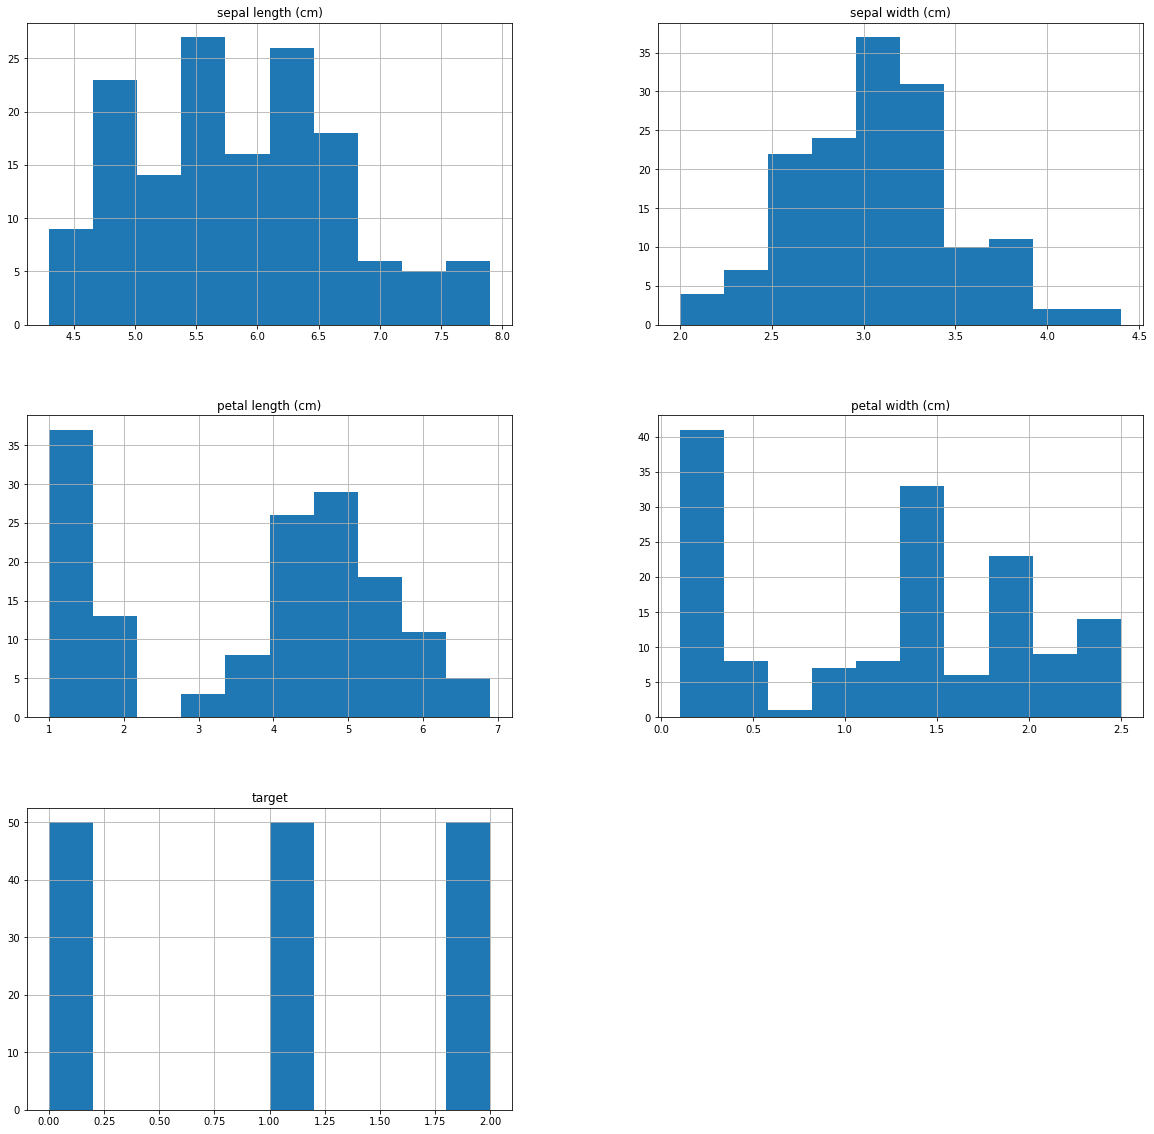

In [5]:
dataframe.hist(figsize=(20,20))

<AxesSubplot:>

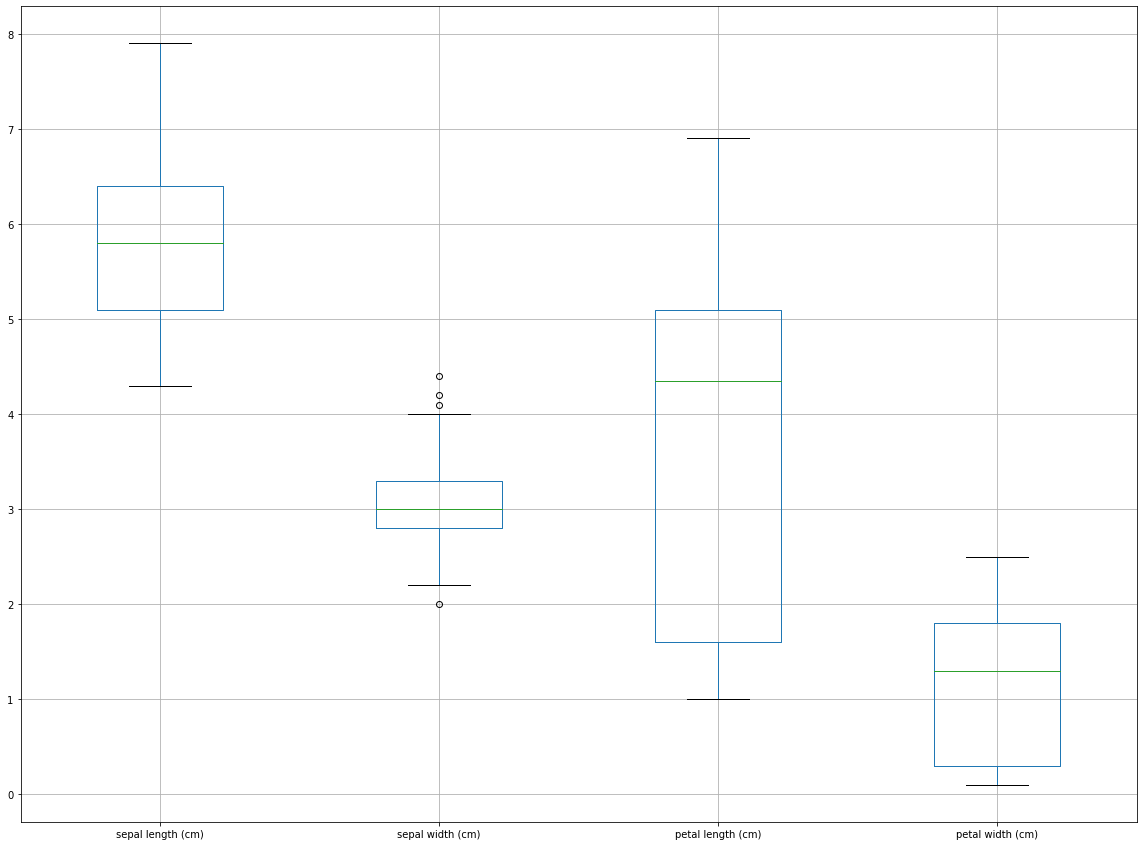

In [6]:
dataframe.drop("target",axis=1).boxplot(figsize=(20,15))

## Statistiques numériques sur notre Dataset 

In [7]:
dataframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
dataframe['target'].value_counts()

0.0    50
2.0    50
1.0    50
Name: target, dtype: int64


<h1 style="color:red">Conclusion : </h1>

<p><b>l'échantillon de fleurs propose plusieurs informations:</b></p><br>
   <b>Les noms des données disponibles :</b> 
   <b>feature_names : Les mesures réalisées sur l'échantillon de fleurs connues et déjà classées<br>
   <b>Data Il s'agit de nos informations, des paramètres de nos vecteurs pour chaque fleur</b><br>
   <b>Le type de chaque espèce : target_names</b><br>
   <b>Le classement de chaque enregistrement data dans son espèce target Il s'agit de la classe de chaque fleur/vecteur</b><br>
<span style="color:blue">Notre Datasets</span> est bien séparé d'après le boxplot<br>
<span style="color:blue">Notre Datasets</span> se compose de 3 genres de donées : <b>0,1 et 2</b>. On va les qualifier comme des types de donées <br>
<span style="color:green">Notre features</span> se compose de 4 types <b>Sepal width</b> et le <b>Sepal length</b>,<b>Petal width</b> et le <b>Petal length</b>

<h1 style="color:red">Summary 1:</h1>
<h3><b>A</b>vant de commencer, on doit comprendre notre Datasets, et la relations entre features</h3>

<p5>Comparaison avec la longeur et la largeur du <span style="color:green">Sepal</span></p5>

In [9]:
y = dataframe['target']

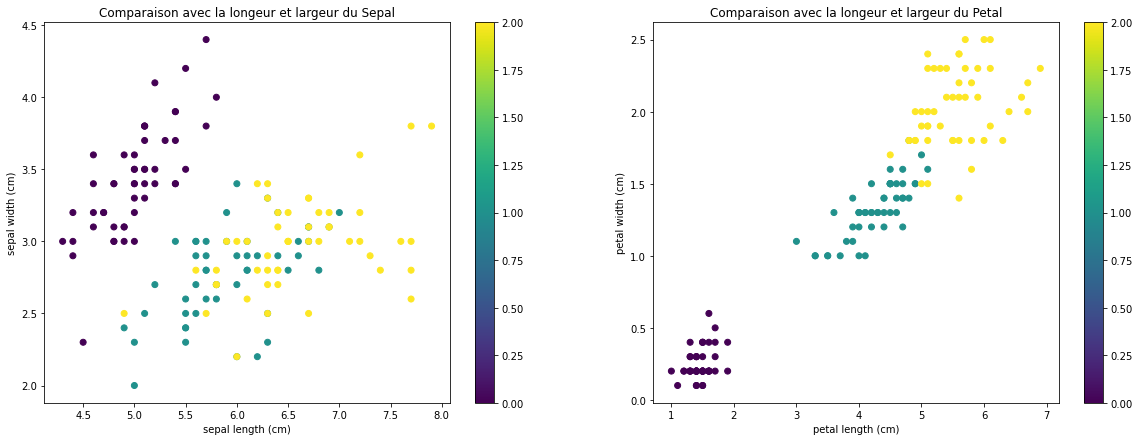

In [10]:
plt.rcParams["figure.figsize"] = (20,7)
plt.subplot(1,2,1)
plt.title("Comparaison avec la longeur et largeur du Sepal")
plt.scatter(dataframe['sepal length (cm)'],dataframe['sepal width (cm)'],c=y)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.colorbar()
plt.subplot(1,2,2)
plt.title("Comparaison avec la longeur et largeur du Petal")
plt.scatter(dataframe['petal length (cm)'],dataframe['petal width (cm)'],c=y)
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.colorbar()

## Séparation des donées

In [11]:
x = dataframe.drop("target",axis=1)
y = dataframe['target']

In [12]:
np.random.seed(1504)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

<span style="color:red"> Remarque : </span> Séparation des donées en Train et Test, on va prendre 20% pour le test et 80% pour le train

# Prédiction avec le model KNN 

<p style="font-size:20px;">Le modèle de prédiction le plus intuitif consiste à chercher pour chaque nouvelle plante  le type palnte  qui lui ressemble le plus parmi tous ceux connus. On appelle cette méthode la méthode des plus proches voisins. Le module scikit-learn implémente cet algorithme Nearest Neighbors et on pourra s’inspirer de l’exemple Nearest Neighbors regression.</p>

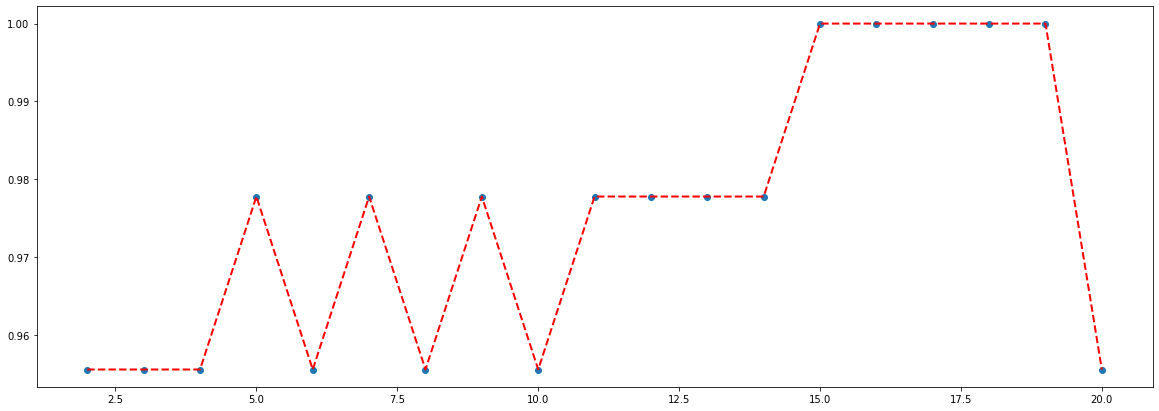

In [13]:
scoreList = []
for i in range(2,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    scoreA = knn.score(x_test,y_test)
    scoreList.append(scoreA)
plt.scatter(range(2,21),scoreList)
plt.plot(range(2,21),scoreList,c="red",lw=2,ls="--")

In [14]:
meilleurcas = 15

<p> Le meilleur cas pour le Grid Search est 5</p>
<h1> Maintenant on entrainera notre model avec k = 15</h1>

In [15]:
knn = KNeighborsClassifier(n_neighbors=meilleurcas)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [16]:
scoreKNN = knn.score(x_test,y_test)
print("Le score de mon model est : {}".format(scoreKNN))

Le score de mon model est : 1.0


<p> Matrice de confusion </p>

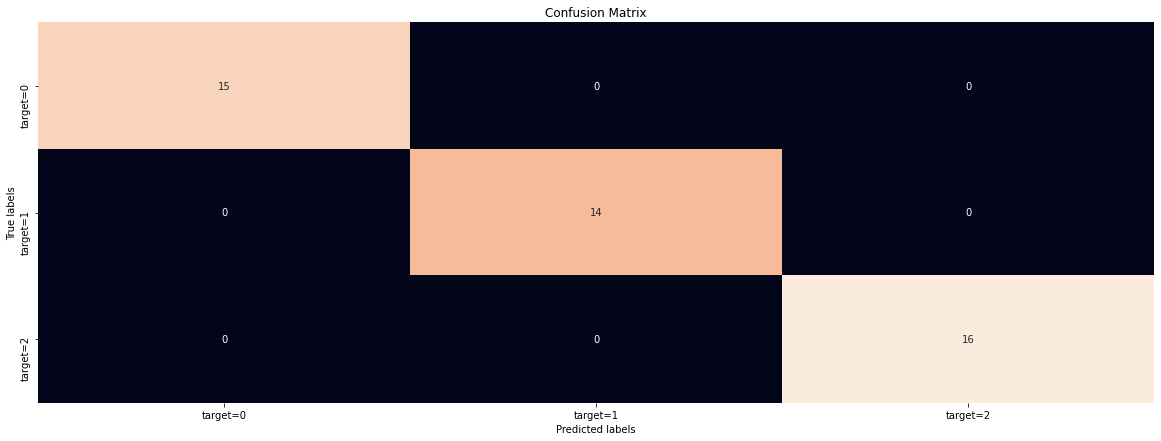

In [17]:
cmKNN = confusion_matrix(y_true=y_test, y_pred=knn.predict(x_test))
ax= plt.subplot()
sns.heatmap(cmKNN, annot=True, ax = ax, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['target=0', 'target=1','target=2'])
ax.yaxis.set_ticklabels(['target=0', 'target=1','target=2'])
plt.show()

# Recherche du meilleur gamma et kernel pour le model SVC

<p>Je crée un dictionnaire dans lequel chaque kernel est associé avec un autre dictionnaire contenant gamma et le score associé</p>

In [18]:
kernels_dict = {'linear':{}, 'poly':{}, 'rbf':{}, 'sigmoid':{}}
for kernel in kernels_dict.keys():
    for i in np.arange(0.001,0.1,0.001):
        modelSVC = svm.SVC(gamma=i,kernel=kernel)
        modelSVC.fit(x_train,y_train)
        scoreA = modelSVC.score(x_test,y_test)
        kernels_dict[kernel][i] = scoreA

In [19]:
def getMaxGammaWithScore(dictio):
    gammaMaximum = list(dictio.keys())[0]
    scoreMaximum = dictio.get(gammaMaximum)
    for gamma,score in dictio.items():
        if score > scoreMaximum:
            scoreMaximum = score
            gammaMaximum = gamma
    return gammaMaximum,scoreMaximum
for kernel in kernels_dict.keys():
    gamma,score = getMaxGammaWithScore(kernels_dict.get(kernel))
    print("le kernel {} a pour max gamma {} et pour score {}".format(kernel,gamma,score))

le kernel linear a pour max gamma 0.001 et pour score 1.0
le kernel poly a pour max gamma 0.033 et pour score 1.0
le kernel rbf a pour max gamma 0.021 et pour score 0.9777777777777777
le kernel sigmoid a pour max gamma 0.003 et pour score 0.6444444444444445


<p> Le meilleur cas pour le Grid Search est gamma 0.008 et kernel est rbf, on peut aussi choisir le poly kernel</p>
<h1> SVC avec gamma = 0.033 et kernel Poly</h1>

In [20]:
modelSVC = svm.SVC(gamma=0.033,kernel="poly")
modelSVC.fit(x_train,y_train)

SVC(gamma=0.033, kernel='poly')

In [21]:
scoreSVC = modelSVC.score(x_test,y_test)
print("Le score de mon model est : {}".format(scoreSVC))

Le score de mon model est : 1.0


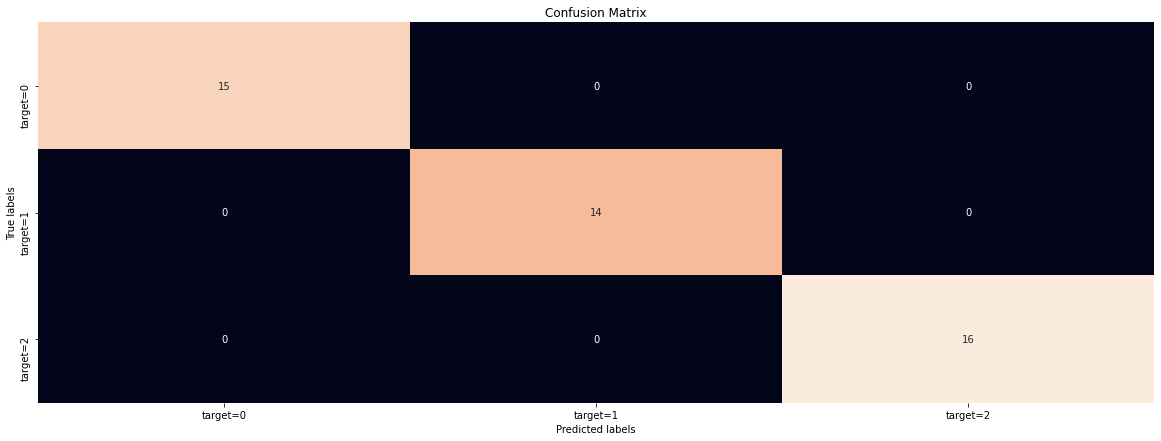

In [22]:
cm1 = confusion_matrix(y_true=y_test, y_pred=modelSVC.predict(x_test))
ax= plt.subplot()
sns.heatmap(cm1, annot=True, ax = ax, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['target=0', 'target=1','target=2'])
ax.yaxis.set_ticklabels(['target=0', 'target=1','target=2'])
plt.show()

# Le modèle RandomForest

<p style="font-size:20px">
 <b>L’algorithme des forêts aléatoires (ou Random Forest en anglais) </b> proposé par Leo Breiman en 
2001 est  l’un  des  algorithmes  les  plus  utilisés  aujourd’hui  pour  traiter  des  problème  de 
classification. Il s’agit d’un algorithme qui comme son nom l’indique combine  plusieurs  arbres  de 
décisions dans une approche de type bagging3. L’algorithme entraîne plusieurs arbres de décisions sur 
des samples sélectionnés aléatoirement. La prédiction de l’algorithme est calculée à partir de la 
moyenne des des prédictions de chaque arbre de décision construit avec des données sont 
quantitatives. Pour les données qualitatives, l’algorithme utilise la moyenne des prédiction des 
modèles indépendants et procède à un vote pour déterminer sa prédiction, comme l’illustre la figure 
II.2 ci-dessous. 
</p>


In [23]:
scoreListRandomForest = []
for i in range(2,52):
    modelForestT = RandomForestClassifier(n_estimators=i,criterion='gini',max_features='auto',max_depth=5)
    modelForestT.fit(x_train, y_train)
    scoreR = modelForestT.score(x_test,y_test)
    scoreListRandomForest.append(scoreR)

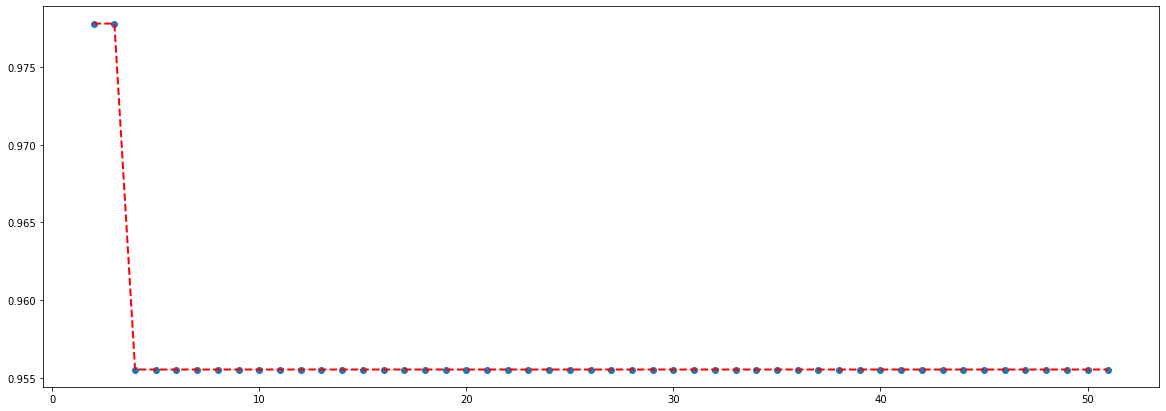

In [24]:
plt.scatter(range(2,52),scoreListRandomForest)
plt.plot(range(2,52),scoreListRandomForest,c="red",lw=2,ls="--")

## Model RandomForestClassifier avec n_estimator = 3

In [25]:
modelForest = RandomForestClassifier(n_estimators=3,criterion='gini',max_features='auto',max_depth=5)
modelForest.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=3)

In [26]:
scoreForest = modelForest.score(x_test,y_test)
print("Le score de mon model est : {}".format(scoreForest))

Le score de mon model est : 0.9555555555555556


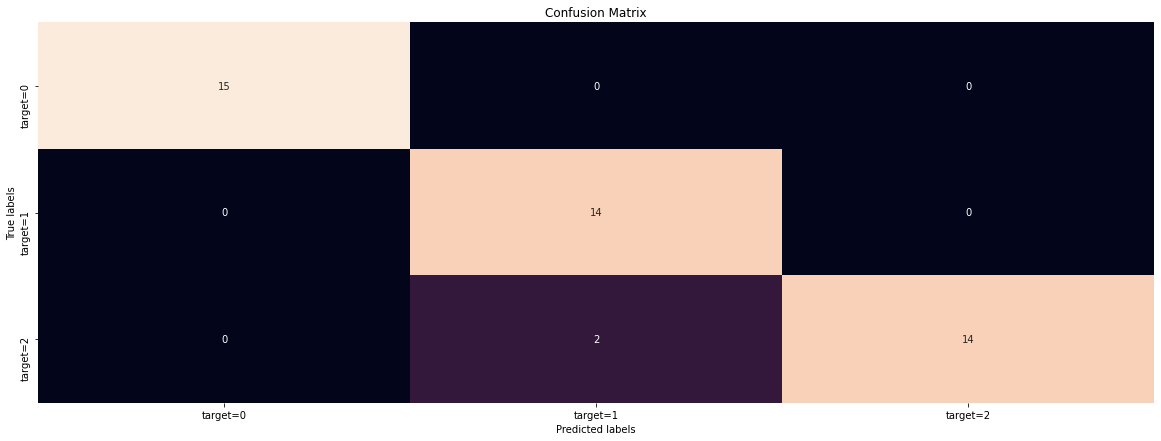

In [27]:
cm2 = confusion_matrix(y_true=y_test, y_pred=modelForest.predict(x_test))
ax= plt.subplot()
sns.heatmap(cm2, annot=True, ax = ax, cbar=False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['target=0', 'target=1','target=2'])
ax.yaxis.set_ticklabels(['target=0', 'target=1','target=2'])
plt.show()

<h4> Pour le model KNN </h4>

In [31]:
print(classification_report(y_test,knn.predict(x_test)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        14
         2.0       1.00      1.00      1.00        16

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



<h4> Pour le model SVC </h4>

In [29]:
print(classification_report(y_test,modelSVC.predict(x_test)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00        14
         2.0       1.00      1.00      1.00        16

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



<h4> Pour le model RandomForest</h4>

In [30]:
print(classification_report(y_test,modelForest.predict(x_test)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       0.88      1.00      0.93        14
         2.0       1.00      0.88      0.93        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



<h3 style="font-size:20px;color:red">Conclusion : </h3>
<p> Je prend le modèle SVC et le KNN car ils ont une meilleur precision mieux que le RandomForest</p>

<p style="font-size:20px">Les méthodes de machine learning sont des bonnes méthodes pour mieux approcher un modèle mais il existe encore une meilleur méthode qui le réseau neuron, en faite elle se compose de plusieurs perceptrons connéctés et entraînés entre eux</p>

<img src="https://www.lebigdata.fr/wp-content/uploads/2019/04/reseau-de-neurones-fonctionnement.jpg"/>